In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
#paths
folder_path_weather = ''
folder_path_rent_history = 'Historia przejazdów/'

In [3]:
#DF weather more info
columns_s_d = ["Kod stacji",
               "Nazwa stacji",
               "Rok",
               "Miesiąc",
               "Dzień",
               "Maksymalna temperatura dobowa [°C]",
               "Status pomiaru TMAX",
               "Minimalna temperatura dobowa [°C]",
               "Status pomiaru TMIN",
               "Średnia temperatura dobowa [°C]",
               "Status pomiaru STD",
               "Temperatura minimalna przy gruncie [°C]",
               "Status pomiaru TMNG",
               "Suma dobowa opadu [mm]",
               "Status pomiaru SMDB",
               "Rodzaj opadu [S/W/ ]",
               "Wysokość pokrywy śnieżnej [cm]",
               "Status pomiaru PKSN",
               "Równoważnik wodny śniegu  [mm/cm]",
               "Status pomiaru RWSN",
               "Usłonecznienie [godziny]",
               "Status pomiaru USL",
               "Czas trwania opadu deszczu [godziny]",
               "Status pomiaru DESZ",
               "Czas trwania opadu śniegu [godziny]",
               "Status pomiaru SNEG",
               "Czas trwania opadu deszczu ze śniegiem [godziny]",
               "Status pomiaru DISN",
               "Czas trwania gradu [godziny]",
               "Status pomiaru GRAD",
               "Czas trwania mgły [godziny]",
               "Status pomiaru MGLA",
               "Czas trwania zamglenia  [godziny]",
               "Status pomiaru ZMGL",
               "Czas trwania sadzi [godziny]",
               "Status pomiaru SADZ",
               "Czas trwania gołoledzi [godziny]",
               "Status pomiaru GOLO",
               "Czas trwania zamieci śnieżnej niskiej [godziny]",
               "Status pomiaru ZMNI",
               "Czas trwania zamieci śnieżnej wysokiej [godziny]",
               "Status pomiaru ZMWS",
               "Czas trwania zmętnienia [godziny]",
               "Status pomiaru ZMET",
               "Czas trwania wiatru >=10m/s [godziny]",
               "Status pomiaru FF10",
               "Czas trwania wiatru >15m/s [godziny]",
               "Status pomiaru FF15",
               "Czas trwania burzy  [godziny]",
               "Status pomiaru BRZA",
               "Czas trwania rosy  [godziny]",
               "Status pomiaru ROSA",
               "Czas trwania szronu [godziny]",
               "Status pomiaru SZRO",
               "Wystąpienie pokrywy śnieżnej  [0/1]",
               "Status pomiaru DZPS",
               "Wystąpienie błyskawicy  [0/1]",
               "Status pomiaru DZBL",
               "Stan gruntu [Z/R]",
               "Izoterma dolna  [cm]",
               "Status pomiaru IZD",
               "Izoterma górna [cm]",
               "Status pomiaru IZG",
               "Aktynometria  [J/cm2]",
               "Status pomiaru AKTN"]
numbers_columns_s_d = [i for i in range(0, 65) if i not in (0, 1, 6, 8, 10, 12, 55, 57, 63)]
weather_df_mi = pd.read_csv(folder_path_weather + 's_d_424_2021.csv', encoding="windows 1250", names=columns_s_d,
                            header=None,
                            usecols=numbers_columns_s_d)

In [4]:
#DF weather simplified
columns_s_d_t = ["Kod stacji",
                 "Nazwa stacji", "Rok", "Miesiąc", "Dzień",
                 "Średnie dobowe zachmurzenie ogólne [oktanty]",
                 "Status pomiaru NOS",
                 "Średnia dobowa prędkość wiatru [m/s]",
                 "Status pomiaru FWS",
                 "Średnia dobowa temperatura [°C]",
                 "Status pomiaru TEMP",
                 "Średnia dobowe ciśnienie pary wodnej [hPa]",
                 "Status pomiaru CPW",
                 "Średnia dobowa wilgotność względna [%]",
                 "Status pomiaru WLGS",
                 "Średnia dobowe ciśnienie na poziomie stacji [hPa]",
                 "Status pomiaru PPPS",
                 "Średnie dobowe ciśnienie na pozimie morza [hPa]",
                 "Status pomiaru PPPM",
                 "Suma opadu dzień  [mm]",
                 "Status pomiaru WODZ",
                 "Suma opadu noc   [mm]",
                 "Status pomiaru WONO"]
weather_df_simply = pd.read_csv('s_d_t_424_2021.csv', encoding="windows 1250", names=columns_s_d_t, header=None,
                                usecols=[2, 3, 4, 5, 7, 9, 11, 13, 15, 17, 19, 21])

In [5]:
#DF rent history
file_nb = [str(i).zfill(2) for i in range(1, 13)]
csv_files = [folder_path_rent_history + "historia_przejazdow_2021-" + nb + ".csv" for nb in file_nb]
rent_history_list_df = (
    pd.read_csv(file, encoding="utf-8", dtype={'Stacja wynajmu': 'string', 'Stacja zwrotu': 'string'},
                parse_dates=['Data wynajmu', 'Data zwrotu']) for file in csv_files)
rent_history_df_12months = pd.concat(rent_history_list_df, ignore_index=True)
rent_history_df_12months.columns = [column.replace(" ", "_") for column in rent_history_df_12months.columns]

In [6]:
rent_history_df_12months.dtypes

UID_wynajmu                int64
Numer_roweru               int64
Data_wynajmu      datetime64[ns]
Data_zwrotu       datetime64[ns]
Stacja_wynajmu    string[python]
Stacja_zwrotu     string[python]
Czas_trwania               int64
dtype: object

In [7]:
rent_history_df_12months.query("Data_wynajmu >= '2021-01-01' & Data_wynajmu < '2021-01-31'")

,UID_wynajmu,Numer_roweru,Data_wynajmu,Data_zwrotu,Stacja_wynajmu,Stacja_zwrotu,Czas_trwania
5,111184651,650178,2021-01-01 00:10:09,2021-01-01 00:15:27,Traugutta / Kościuszki,Traugutta / Kościuszki,6
6,111184655,651385,2021-01-01 00:10:42,2021-01-01 00:20:17,Pilczycka / Kozanowska,Drzewieckiego / Dedala,10
7,111184679,651165,2021-01-01 00:15:47,2021-01-01 00:41:10,Kozanowska / Pilczycka,Bezpieczna / Obornicka,26
8,111184701,650582,2021-01-01 00:19:50,2021-01-01 00:33:33,Ślężna / Kamienna (Uniw. Ekonomiczny),Poza stacją,14
9,111184705,57240,2021-01-01 00:21:15,2021-01-01 00:33:32,Ślężna / Kamienna (Uniw. Ekonomiczny),Poza stacją,13
...,...,...,...,...,...,...,...
28317,111729942,57310,2021-01-30 23:31:10,2021-01-30 23:37:45,Legnicka / Wejherowska,Na Ostatnim Groszu,7
28318,111729981,57795,2021-01-30 23:38:20,2021-01-30 23:56:54,Ślężna / Kamienna (Uniw. Ekonomiczny),Borowska (Uniw. Szpital Kliniczny),19
28319,111729995,650671,2021-01-30 23:39:33,2021-01-30 23:49:37,Kościuszki / Komuny Paryskiej / Zgodna,Szewska / Kazimierza Wielkiego,11
28320,111730015,650769,2021-01-30 23:43:36,2021-01-31 00:03:50,Pilczycka (Stadion Miejski),Poza stacją,21


In [8]:
rent_history_df_12months[(rent_history_df_12months['Data_wynajmu'] >= pd.to_datetime('2021-01-01')) & (
                          rent_history_df_12months['Data_wynajmu'] < pd.to_datetime('2021-02-01'))]


,UID_wynajmu,Numer_roweru,Data_wynajmu,Data_zwrotu,Stacja_wynajmu,Stacja_zwrotu,Czas_trwania
5,111184651,650178,2021-01-01 00:10:09,2021-01-01 00:15:27,Traugutta / Kościuszki,Traugutta / Kościuszki,6
6,111184655,651385,2021-01-01 00:10:42,2021-01-01 00:20:17,Pilczycka / Kozanowska,Drzewieckiego / Dedala,10
7,111184679,651165,2021-01-01 00:15:47,2021-01-01 00:41:10,Kozanowska / Pilczycka,Bezpieczna / Obornicka,26
8,111184701,650582,2021-01-01 00:19:50,2021-01-01 00:33:33,Ślężna / Kamienna (Uniw. Ekonomiczny),Poza stacją,14
9,111184705,57240,2021-01-01 00:21:15,2021-01-01 00:33:32,Ślężna / Kamienna (Uniw. Ekonomiczny),Poza stacją,13
...,...,...,...,...,...,...,...
28831,111744857,651013,2021-01-31 23:43:49,2021-01-31 23:51:21,al. Karkonoska / Jeździecka,Zwycięska / Ołtaszyńska,8
28832,111744858,57159,2021-01-31 23:44:42,2021-01-31 23:53:54,Poza stacją,Bacciarellego / pętla autobusowa,10
28833,111744900,650006,2021-01-31 23:54:34,2021-01-31 23:59:29,Nowowiejska / Jedności Narodowej,Nowowiejska / Górnickiego,5
28834,111744877,651295,2021-01-31 23:49:56,2021-02-01 00:11:06,Żmigrodzka / Broniewskiego,Poza stacją,22


In [9]:
# function that return dataframe of daily rentals

def specific_day_dataframe( day_daytime, title_column_of_time = "Data_wynajmu", df=rent_history_df_12months):
    wanted_day = day_daytime
    next_day_after_wanted_day = wanted_day+pd.to_timedelta(1,"D")
    wanted_day_string=wanted_day.strftime('%Y-%m-%d')
    next_day_after_wanted_day_string = next_day_after_wanted_day.strftime('%Y-%m-%d')
    specific_time_df = df.query(title_column_of_time + " >= '" + wanted_day_string + "' & Data_wynajmu < '" + next_day_after_wanted_day_string + "'")
    return specific_time_df

In [10]:
test = specific_day_dataframe(pd.to_datetime("01-01-2021"))["Czas_trwania"]

In [11]:
# function that return daily stats

def monthly_stats(period_of_interest_DatetimeIndex):
    stats_df = pd.DataFrame( index=[day.day for day in period_of_interest_DatetimeIndex] ,columns=['Nb_of_Rentals'])
    for day in period_of_interest_DatetimeIndex:
        day_stats = {'Nb_of_Rentals' : len(specific_day_dataframe(day))}
        stats_df.loc[day.day] = day_stats
    return stats_df

C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


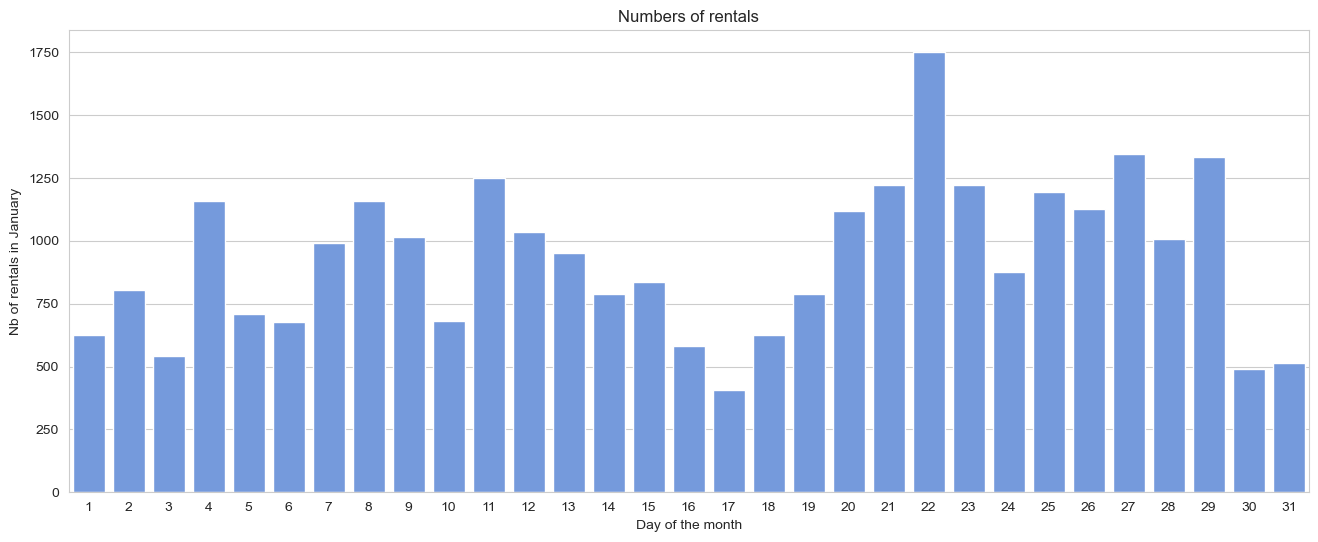

In [12]:
#monthly rentals stats of January

period_of_interest = pd.date_range(start = '2021-01-01', end = '2021-01-31', freq='D')
January_stats = monthly_stats(period_of_interest)
fig = plt.figure(figsize=(16,6))
with sns.axes_style(style='whitegrid'):
    ax = sns.barplot(data=January_stats,x = January_stats.index,y = 'Nb_of_Rentals',color='cornflowerblue')
    plt.title('Numbers of rentals')
    plt.xlabel('Day of the month')
    plt.ylabel('Nb of rentals in January')
    plt.show()

C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


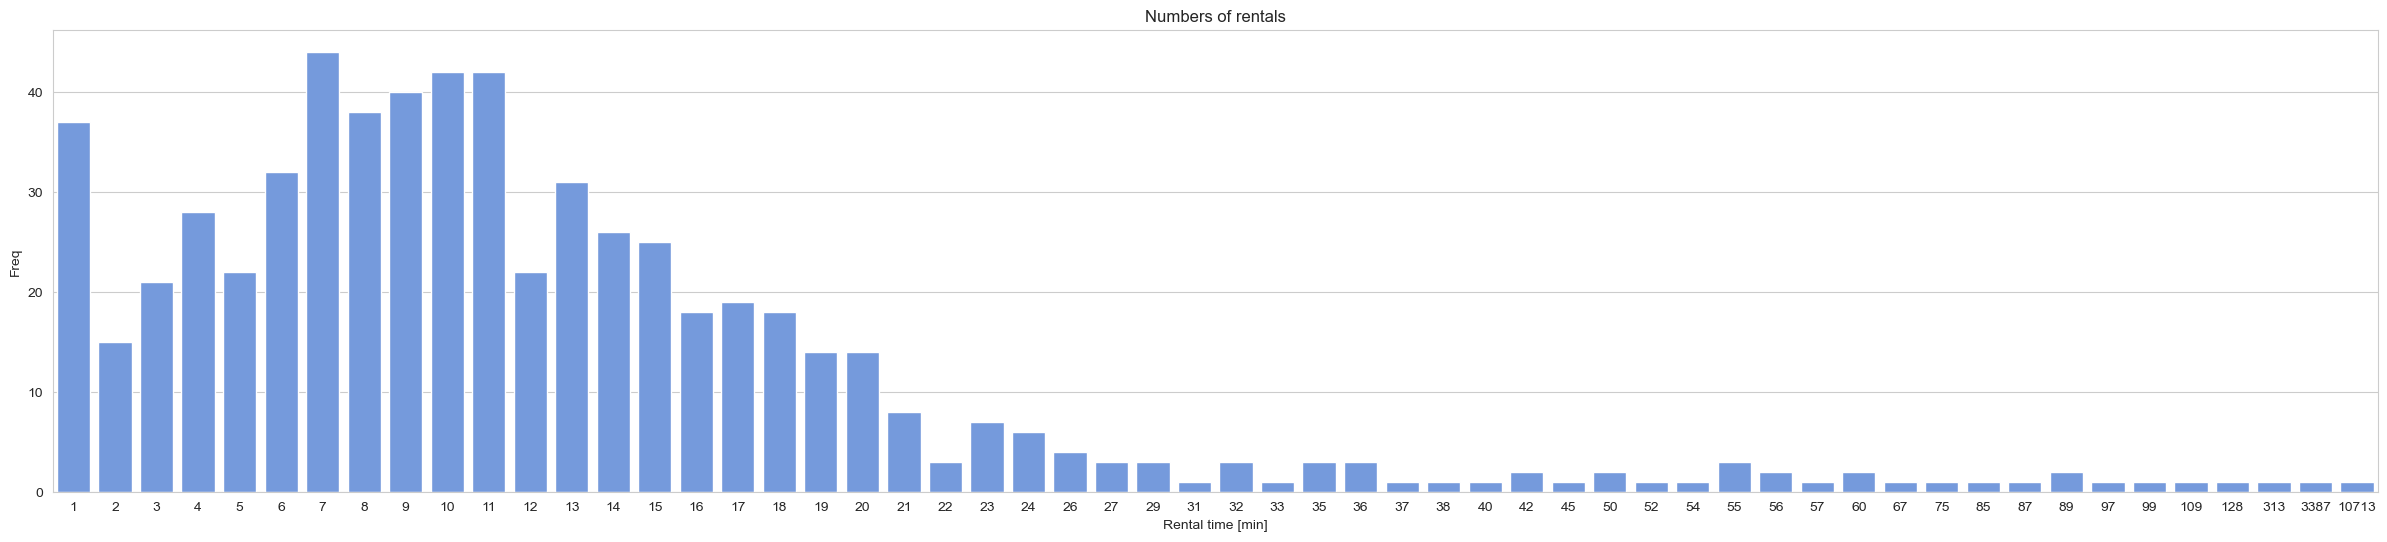

In [13]:
#daily rental time statistics
daily_rental_time_stats = specific_day_dataframe(pd.to_datetime('01-01-2021')).Czas_trwania.value_counts().to_frame()
type(daily_rental_time_stats)
fig_rental_time = plt.figure(figsize = (30,6))
with sns.axes_style(style='whitegrid'):
    ax = sns.barplot(data = daily_rental_time_stats,x = daily_rental_time_stats.index, y='count',color='cornflowerblue')
    plt.title('Numbers of rentals')
    plt.xlabel('Rental time [min]')
    plt.ylabel('Freq')
    plt.show()



In [14]:
daily_rental_time_stats

,count
Czas_trwania,
7,44
10,42
11,42
9,40
8,38
1,37
6,32
13,31
4,28


In [15]:
#what is rental bike?
# Rent a bike from station, to the same station, but ride must take more than 5 minutes

In [16]:
# filtration- remove durations that were caused by accident
#minutes
min_duration = 5
max_duration = 60

In [17]:
def specific_day_filtered_dataframe( day_daytime, title_column_of_time = "Data_wynajmu", df=rent_history_df_12months):
    wanted_day = day_daytime
    next_day_after_wanted_day = wanted_day+pd.to_timedelta(1,"D")
    wanted_day_string = wanted_day.strftime('%Y-%m-%d')
    next_day_after_wanted_day_string = next_day_after_wanted_day.strftime('%Y-%m-%d')
    specific_time_df = df.query(title_column_of_time + " >= '" + wanted_day_string + "' & Data_wynajmu < '" + next_day_after_wanted_day_string + "' & Czas_trwania > "+ str(min_duration) +" & Czas_trwania < "+ str(max_duration))
    return specific_time_df

C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\adamu\.conda\envs\pwrOG\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


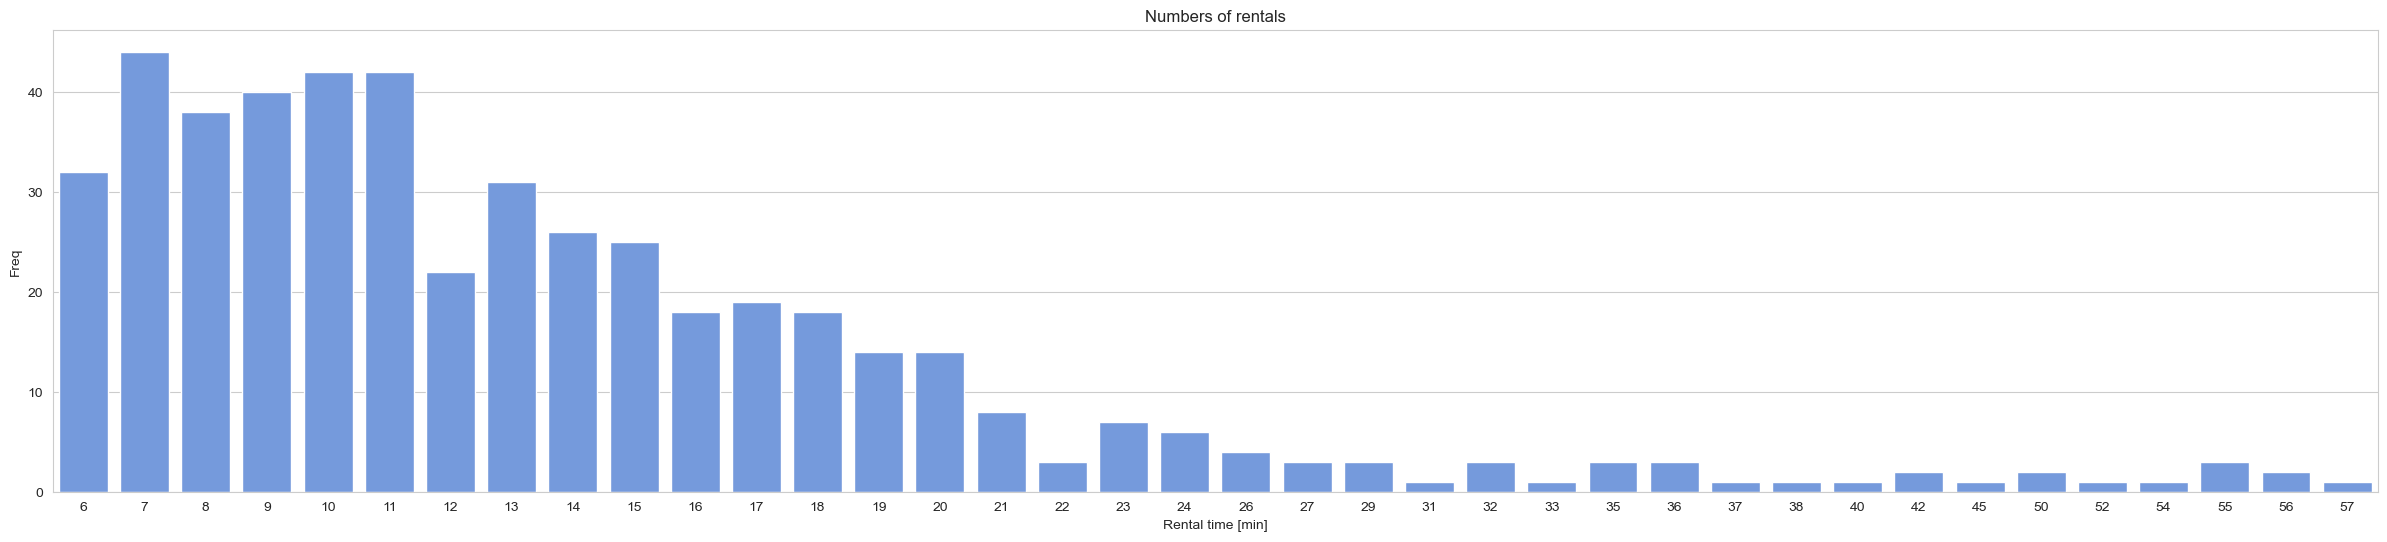

In [18]:
#filtered daily rental time statistics

daily_rental_time_stats = specific_day_filtered_dataframe(pd.to_datetime('01-01-2021')).Czas_trwania.value_counts().to_frame()
fig_rental_time_filtered = plt.figure(figsize=(30,6))
with sns.axes_style(style='whitegrid'):
    ax = sns.barplot(data=daily_rental_time_stats,x = daily_rental_time_stats.index, y='count' ,color='cornflowerblue')
    plt.title('Numbers of rentals')
    plt.xlabel('Rental time [min]')
    plt.ylabel('Freq')
    plt.show()